<a href="https://colab.research.google.com/github/kcw0331/Environmental-Health-Big-Data-Analysis/blob/main/14%EC%A3%BC%EC%B0%A8/Test_R_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

먼저 본 문제지를 본인의 google drive 에 저장한 후 연습을 수행하세요.

File -> Save a copy in drive

## Quiz 

R의 tidyverse 패키지를 사용하여 아래의 문제들을 풀어보도록 합시다. 


In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
install.packages("babynames")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(babynames)

미국에서 5번 이상 사용된 아기 이름 데이터: babynames

In [ ]:
head(babynames)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


In [ ]:
dim(babynames)

[1] 1924665       5

### Q1. 1900 년도에 태어난 남자, 여자 이름 top 5개를 알려주세요.




In [ ]:
babynames %>% filter(year == 1900, sex == "F") %>% arrange(desc(n)) %>% head (5)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1900,F,Mary,16706,0.05257559
1900,F,Helen,6343,0.01996211
1900,F,Anna,6114,0.01924142
1900,F,Margaret,5304,0.01669226
1900,F,Ruth,4765,0.01499597


In [ ]:
babynames %>% filter(year == 1900, sex == "M") %>% arrange(desc(n)) %>% head (5)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1900,M,John,9829,0.06062307
1900,M,William,8579,0.05291335
1900,M,James,7245,0.04468554
1900,M,George,5403,0.03332449
1900,M,Charles,4099,0.02528171


### 2. 연도별 태어난 남여 인구수를 비교하는 그래프를 그려보세요.  
데이터는 5개 이상 사용된 아기 이름 데이터지만, 데이터에 나온 아이들이 전체 데이터라고 가정하고 문제를 풀어보세요.

In [ ]:
babynames %>% group_by(year, sex) %>% summarize(N = sum(n))

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



year,sex,N
<dbl>,<chr>,<int>
1880,F,90993
1880,M,110491
1881,F,91953
1881,M,100743
1882,F,107847
1882,M,113686
1883,F,112319
1883,M,104627
1884,F,129020


`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



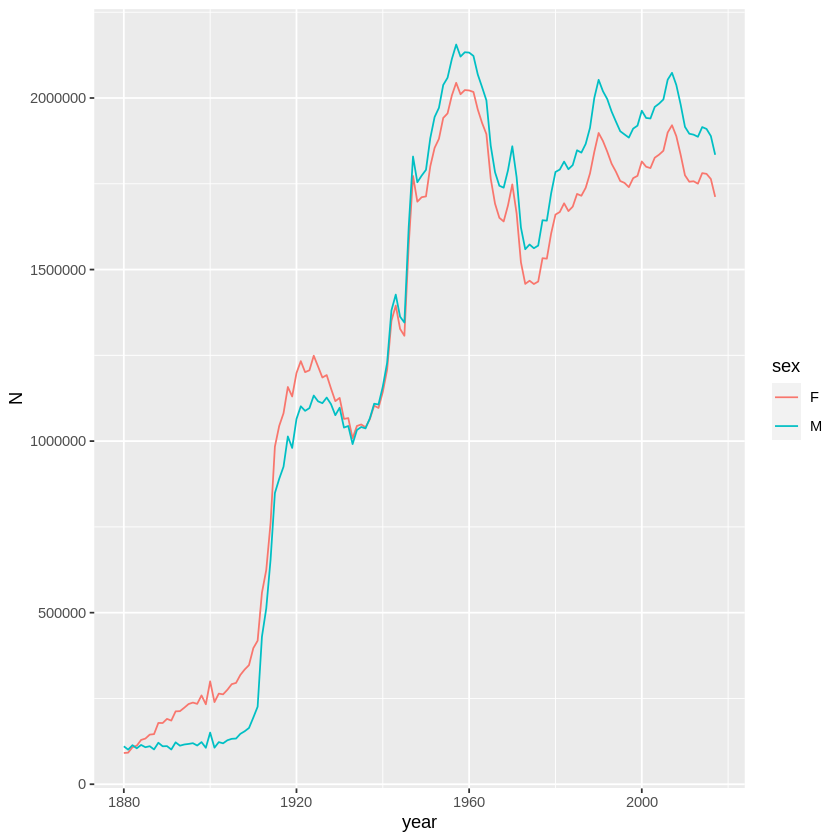

In [ ]:
babynames %>% group_by(year, sex) %>% summarize(N = sum(n)) %>% ggplot(aes(x = year, y = N, col = sex)) + 
   geom_line()

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



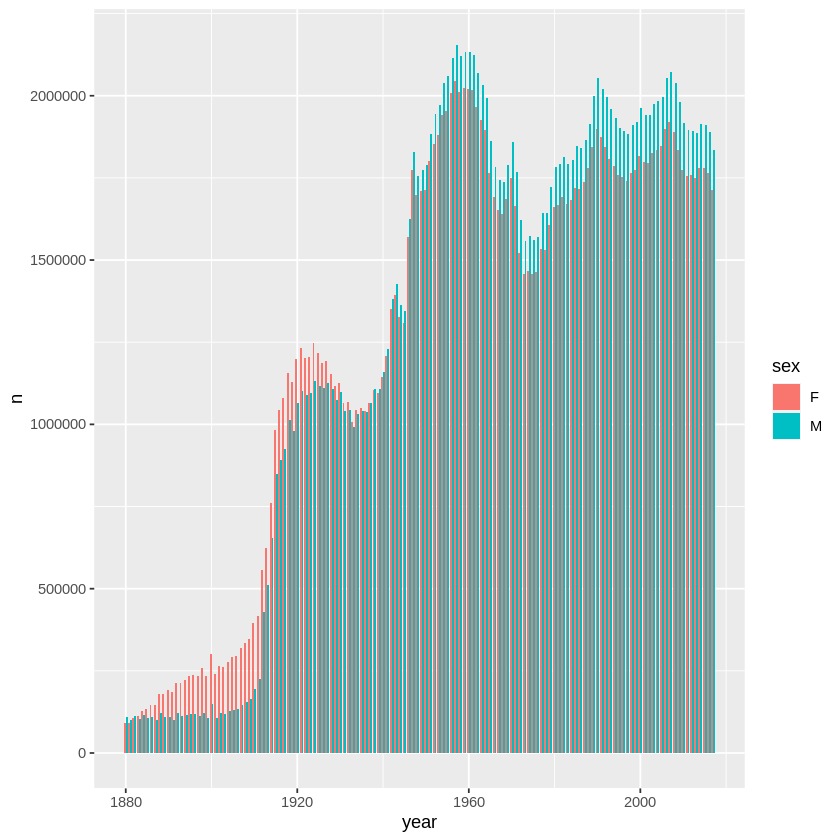

In [ ]:
babynames %>% group_by(year, sex) %>% summarize(n = sum(n)) %>% ggplot(aes(x = year, y = n, fill = sex)) + 
   geom_bar(stat='identity', position = 'dodge')

### 3. 주어진 성별의 이름에 대해서 연도별로 태어난 아동 수를 그려주는 함수를 작성하세요. 

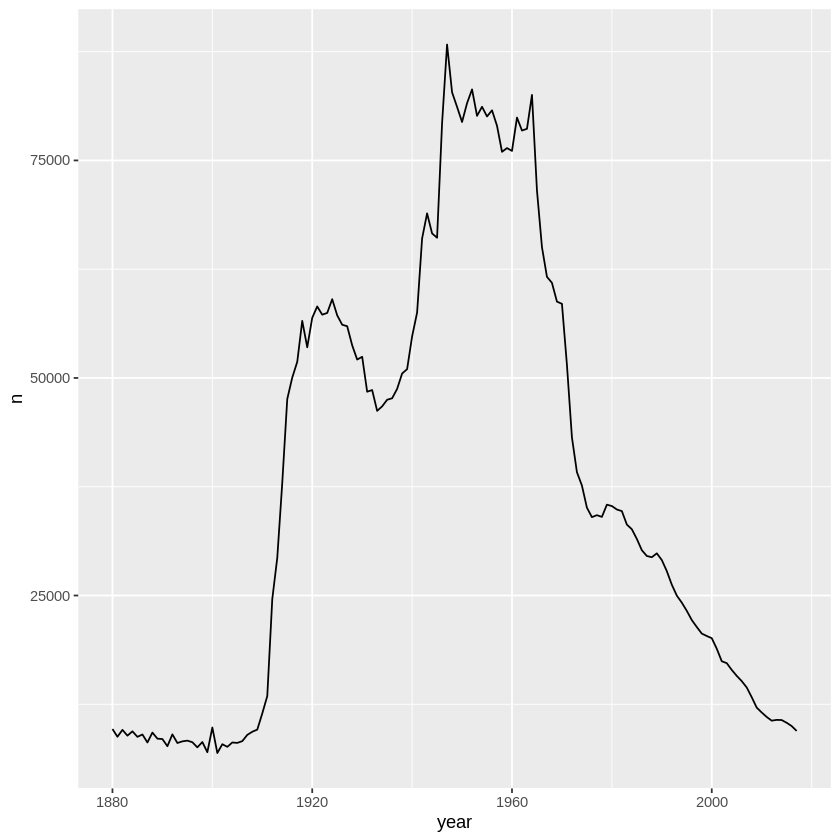

In [ ]:
babynames %>% filter (name == "John", sex == "M") %>% ggplot( aes(x = year, y = n)) + geom_line()

In [ ]:
test <- function(nm, sx) {
  newd = filter(babynames, name == nm, sex ==sx)
  ggplot(newd, aes(x=year, y = n)) + geom_line()
}

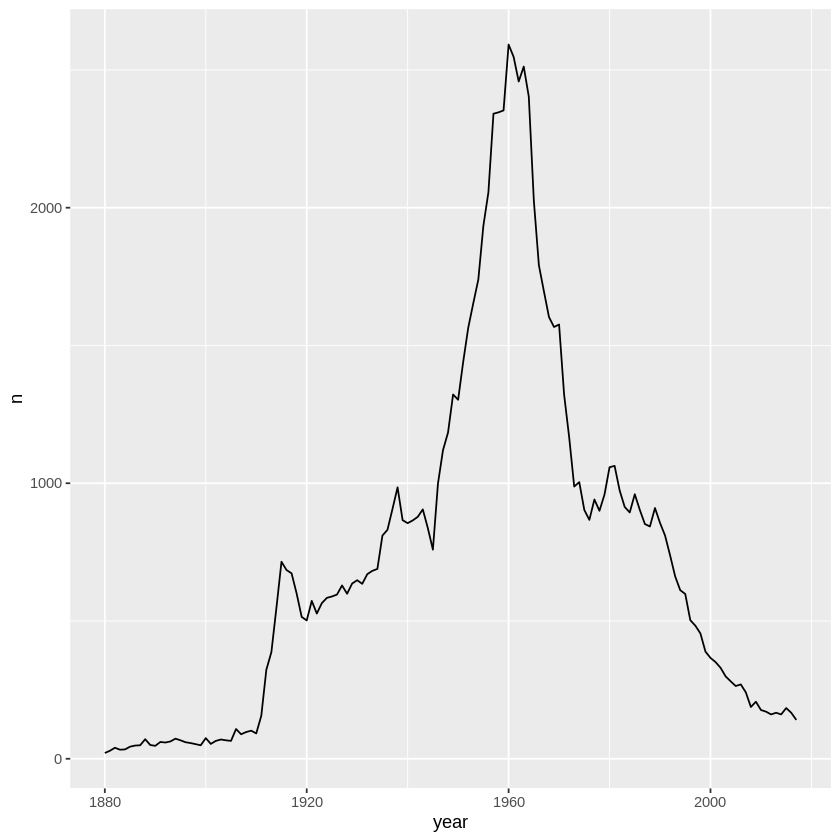

In [ ]:
test("Karl", "M")

### 4. 본인이 만든 함수를 이용하여 이름들을 시각화 해 보면서 재미있는 패턴을 가진 이름에 대해 시각화 하고, theme 옵션을 사용해서 시각화 결과가 깔끔하게 나오게 수정해보세요. 

### 5. 남자 여자 이름 모두 쓰이는 이름들을 몇 개 찾아서 연도별 패턴을 시각화 해 보세요.

 - 1900 년도에 1000개이상 쓰인 이름들을 추려보세요.
 - 추려진 data의 이름들에 대해서 table 함수를 썼을 때 2 가 나오는 이름들은 남, 여 모두에서 1000회 이상 쓰인 이름입니다. 
 - 앞에서 확인한 이름으로 남자 여자별로 연도별 이름사용횟수를 그려주는 시각화를 수행해보세요.
 - 해당 그래플를 해석해서 story를 설명해보세요


In [ ]:
newd = babynames %>% filter( year == 1900 , n > 1000 )

tb = table(newd$name) 
tb


      Ada     Agnes    Albert     Alice      Alma      Anna     Annie    Arthur 
        1         1         1         1         1         1         1         1 
 Beatrice    Bertha    Bessie   Blanche      Carl    Carrie Catherine   Charles 
        1         1         1         1         1         1         1         1 
  Charlie     Clara  Clarence      Cora   Dorothy      Earl     Edith      Edna 
        1         1         1         1         1         1         1         1 
   Edward Elizabeth      Ella     Elsie      Emma    Ernest    Esther     Ethel 
        1         1         1         1         1         1         1         1 
      Eva    Evelyn    Fannie  Florence   Frances     Frank      Fred    George 
        1         1         1         1         1         1         1         1 
 Gertrude    Gladys     Grace    Harold     Harry    Hattie     Hazel     Helen 
        1         1         1         1         1         1         1         1 
    Henry       Ida     Ire

In [ ]:
newd = babynames %>% filter( year == 1900 , n > 1000 )

tb = table(newd$name) 
names(tb)[tb == 2]

[1] "Willie"

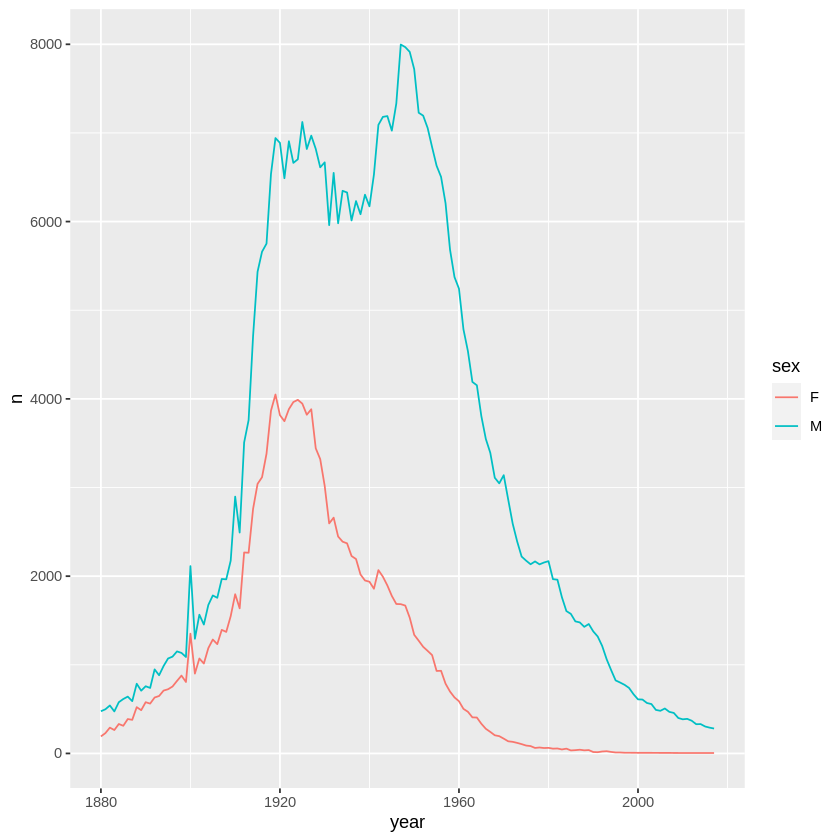

In [ ]:
babynames %>% filter(name == "Willie") %>% ggplot( aes(x = year, y = n, col = sex)) +geom_line()

그래프 설명: Willie라는 이름은 1880 연 이래로 남여 모두 점점 많이 사용되는 추세가 보이며, 1920년을 기점으로 가장 많이 사용된 것으로 보입니다. 남자 이름으로 더 많이 사용되었으며 해가 가면서 남, 여 모두 이름 사용비율이 줄어드는 추세에 있는 것을 볼 수 있습니다.